In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.framework.ops import disable_eager_execution
#tf.enable_eager_execution()
disable_eager_execution()
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [99]:
df_V = pd.read_csv('v_data.csv',header=None)
df_V_new = pd.read_csv('v_data_new.csv',header=None)
df_w = pd.read_csv('W_data.csv',header=None)
df_w_new = pd.read_csv('W_data_new.csv',header=None)
df_X = pd.read_csv('X_data.csv',header=None)
df_X_new = pd.read_csv('X_data_new.csv',header=None)
df_c = pd.read_csv('C_data.csv',header=None)
df_c_new = pd.read_csv('C_data_new.csv',header=None)
df_V_n = pd.concat([df_V,df_V_new],axis =0)
df_w_n = pd.concat([df_w,df_w_new],axis =0)
df_X_n = pd.concat([df_X,df_X_new],axis =0)
df_c_n = pd.concat([df_c,df_c_new],axis =0)
df_1 = pd.concat([df_V_n,df_w_n],axis =1)
df_2 = pd.concat([df_1,df_c_n],axis=1)
df_final = pd.concat([df_2,df_X_n],axis=1)

In [100]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.9615,2.919700,3.87320,3.14150,2.0131,4.4406,3.8592,2.96250,3.56980,6.1789,...,0,0,0,0,1,1,0,1,0,1
1,4.1357,2.612100,3.70600,4.38840,2.1334,4.5101,4.8861,0.88837,3.67120,2.7633,...,0,0,1,1,1,1,0,1,0,0
2,3.2941,4.733300,4.35720,2.30700,2.4676,2.7961,1.1327,2.69530,2.55060,5.3549,...,1,1,1,1,1,1,1,0,0,0
3,6.5858,3.774200,0.24668,3.42170,4.7120,1.7554,1.4074,4.01100,5.12580,3.6541,...,0,0,0,0,0,0,0,0,0,1
4,4.9552,0.004703,1.46560,5.06710,5.2831,4.3270,6.7785,1.12130,3.43600,4.5849,...,1,1,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.0754,2.514500,4.66860,2.48310,1.1623,3.0957,2.9556,3.39100,4.25470,3.6477,...,1,1,1,0,1,1,0,0,0,0
99996,3.1998,2.438200,2.74900,1.94360,6.3486,4.6354,3.3084,2.91210,0.55029,6.6118,...,0,1,0,1,1,1,1,0,1,0
99997,4.4578,5.610700,2.42160,0.08398,2.3900,1.9757,2.1217,3.38370,2.58200,2.0142,...,0,1,1,1,0,0,0,0,1,1
99998,1.3189,3.575400,2.57800,4.48630,3.3390,3.8820,4.4159,5.38640,3.06180,1.5489,...,0,1,1,0,0,0,1,1,1,0


In [101]:
col_name = []
for i in range(91):
    col_name.append("col"+str(i))
print(col_name)

['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'col40', 'col41', 'col42', 'col43', 'col44', 'col45', 'col46', 'col47', 'col48', 'col49', 'col50', 'col51', 'col52', 'col53', 'col54', 'col55', 'col56', 'col57', 'col58', 'col59', 'col60', 'col61', 'col62', 'col63', 'col64', 'col65', 'col66', 'col67', 'col68', 'col69', 'col70', 'col71', 'col72', 'col73', 'col74', 'col75', 'col76', 'col77', 'col78', 'col79', 'col80', 'col81', 'col82', 'col83', 'col84', 'col85', 'col86', 'col87', 'col88', 'col89', 'col90']


In [102]:
df_final.columns = col_name

In [103]:
df_final['col60']

0        1.474200e-14
1        1.939100e-14
2        7.100700e-14
3        7.046900e-16
4        2.871200e-13
             ...     
99995    4.437500e-14
99996    1.431700e-13
99997    1.666500e-13
99998    1.191200e-14
99999    6.007400e-14
Name: col60, Length: 200000, dtype: float64

In [104]:
index_to_be_removed = []
for index,row in df_final.iterrows():
  if(row['col60']==0):
    index_to_be_removed.append(index)
print(len(index_to_be_removed))

31459


In [105]:
df_non_zeros = df_final.drop(index_to_be_removed)

In [106]:
df_new = df_non_zeros
df_new.iloc[:,30:60] = df_new.iloc[:,30:60].div(df_new['col60'],axis=0)

c:\users\venkat\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [107]:
df_new.iloc[:,30:60]

,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,...,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59
0,0.020908,3.148352,0.000100,0.011090,0.966151,1.647334,1.160494,2.442816,1.115249,0.063138,...,7.593949,0.606370,65430.742097,2.290802e+00,0.005208,0.100699,0.423748,0.004738,17.715371,0.017198
1,0.135542,0.048414,0.027349,2.361302,2.595276,2.337682,0.358924,2.627972,2.069053,0.006364,...,22.438245,25.242638,0.001754,2.130318e-02,0.002628,0.032401,0.745500,0.063473,235.083286,0.076520
2,0.056817,0.298055,0.127110,508.963905,0.250961,0.031512,0.002301,0.000064,0.000229,2.244990,...,0.023202,0.136177,0.155942,4.111144e-03,0.013395,0.008583,0.000077,21.076795,2.437647,0.475869
3,0.344492,0.509401,13.191190,17.187700,0.556656,3546.665910,0.014066,37.146831,3.976358,217.953994,...,6.742255,36.241468,84.816018,1.150038e+01,2288.949751,0.307156,99985.809363,422.980318,2.759511,0.092292
4,0.011877,0.066895,0.040770,0.019037,0.023113,0.234895,0.000065,0.010642,0.003693,0.744009,...,0.018988,0.000149,0.026919,6.974436e-02,0.233944,0.000827,0.007747,5.727570,0.001514,0.000125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6.624434,15.233820,2.237204,2.485792,0.131113,0.404430,0.622112,0.605191,0.221318,0.252277,...,0.139201,0.159233,106.600660,9.893438e-03,0.149762,0.005865,8.098395,1.933965,1.427896,0.037736
99995,0.695820,0.022456,0.987177,2.884958,0.872699,0.303955,0.392113,154.138592,0.008334,0.240180,...,0.001997,0.012622,0.001416,1.477499e+00,0.001207,0.006800,162.350423,2.282141,7.966648,1.102287
99997,0.014542,0.002223,0.284878,0.045387,0.190741,0.000031,0.003684,0.004890,0.258560,0.226409,...,0.272763,0.002049,0.014723,7.881188e-09,1.024902,5.789619,0.568977,2.513231,0.042131,0.001992
99998,2.693083,69.950470,87.122230,0.081981,0.049934,4.801461,0.001451,0.206926,1.185359,101.796508,...,10.592680,0.098942,0.050398,1.075722e+01,3.510913,460.980524,0.002258,0.006461,0.002620,0.793251


In [108]:
del df_new['col60']

In [109]:
from scipy import stats
df_new = df_new[(np.abs(stats.zscore(df_new)) < 3).all(axis=1)]

In [110]:
df_new

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90
0,3.9615,2.919700,3.873200,3.14150,2.0131,4.4406,3.8592,2.96250,3.5698,6.1789,...,0,0,0,0,1,1,0,1,0,1
1,4.1357,2.612100,3.706000,4.38840,2.1334,4.5101,4.8861,0.88837,3.6712,2.7633,...,0,0,1,1,1,1,0,1,0,0
2,3.2941,4.733300,4.357200,2.30700,2.4676,2.7961,1.1327,2.69530,2.5506,5.3549,...,1,1,1,1,1,1,1,0,0,0
3,6.5858,3.774200,0.246680,3.42170,4.7120,1.7554,1.4074,4.01100,5.1258,3.6541,...,0,0,0,0,0,0,0,0,0,1
4,4.9552,0.004703,1.465600,5.06710,5.2831,4.3270,6.7785,1.12130,3.4360,4.5849,...,1,1,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,4.4628,3.466700,0.061922,1.46550,4.0749,6.5138,5.1470,2.67750,2.5472,2.3407,...,1,1,0,1,1,1,0,0,0,1
99995,3.0754,2.514500,4.668600,2.48310,1.1623,3.0957,2.9556,3.39100,4.2547,3.6477,...,1,1,1,0,1,1,0,0,0,0
99997,4.4578,5.610700,2.421600,0.08398,2.3900,1.9757,2.1217,3.38370,2.5820,2.0142,...,0,1,1,1,0,0,0,0,1,1
99998,1.3189,3.575400,2.578000,4.48630,3.3390,3.8820,4.4159,5.38640,3.0618,1.5489,...,0,1,1,0,0,0,1,1,1,0


In [111]:
df_new.iloc[:,30:60]

,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,...,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59
0,0.020908,3.148352,0.000100,0.011090,0.966151,1.647334,1.160494,2.442816,1.115249,0.063138,...,7.593949,0.606370,65430.742097,2.290802e+00,0.005208,0.100699,0.423748,0.004738,17.715371,0.017198
1,0.135542,0.048414,0.027349,2.361302,2.595276,2.337682,0.358924,2.627972,2.069053,0.006364,...,22.438245,25.242638,0.001754,2.130318e-02,0.002628,0.032401,0.745500,0.063473,235.083286,0.076520
2,0.056817,0.298055,0.127110,508.963905,0.250961,0.031512,0.002301,0.000064,0.000229,2.244990,...,0.023202,0.136177,0.155942,4.111144e-03,0.013395,0.008583,0.000077,21.076795,2.437647,0.475869
3,0.344492,0.509401,13.191190,17.187700,0.556656,3546.665910,0.014066,37.146831,3.976358,217.953994,...,6.742255,36.241468,84.816018,1.150038e+01,2288.949751,0.307156,99985.809363,422.980318,2.759511,0.092292
4,0.011877,0.066895,0.040770,0.019037,0.023113,0.234895,0.000065,0.010642,0.003693,0.744009,...,0.018988,0.000149,0.026919,6.974436e-02,0.233944,0.000827,0.007747,5.727570,0.001514,0.000125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6.624434,15.233820,2.237204,2.485792,0.131113,0.404430,0.622112,0.605191,0.221318,0.252277,...,0.139201,0.159233,106.600660,9.893438e-03,0.149762,0.005865,8.098395,1.933965,1.427896,0.037736
99995,0.695820,0.022456,0.987177,2.884958,0.872699,0.303955,0.392113,154.138592,0.008334,0.240180,...,0.001997,0.012622,0.001416,1.477499e+00,0.001207,0.006800,162.350423,2.282141,7.966648,1.102287
99997,0.014542,0.002223,0.284878,0.045387,0.190741,0.000031,0.003684,0.004890,0.258560,0.226409,...,0.272763,0.002049,0.014723,7.881188e-09,1.024902,5.789619,0.568977,2.513231,0.042131,0.001992
99998,2.693083,69.950470,87.122230,0.081981,0.049934,4.801461,0.001451,0.206926,1.185359,101.796508,...,10.592680,0.098942,0.050398,1.075722e+01,3.510913,460.980524,0.002258,0.006461,0.002620,0.793251


In [112]:
from scipy import stats
df_new = df_new[(np.abs(stats.zscore(df_new)) < 3).all(axis=1)]

In [113]:
X_1_nz_train = df_new.iloc[:110071,0:30].values
X_2_nz_train = df_new.iloc[:110071,30:60].values
#X_3_nz_train = df_new.iloc[:110071,60:61].values
Y_nz_train = df_new.iloc[:110071,60:90].values

print(X_1_nz_train.shape)
print(X_2_nz_train.shape)
#print(X_3_nz_train.shape)
#print(X_3_nz_train)
print(Y_nz_train.shape)

X_1_nz_test = df_new.iloc[110071:,0:30].values
X_2_nz_test = df_new.iloc[110071:,30:60].values
#X_3_nz_test = df_new.iloc[110071:,60:61].values
Y_nz_test = df_new.iloc[110071:,60:90].values


print(X_1_nz_test.shape)
print(X_2_nz_test.shape)
#print(X_3_nz_test.shape)
print(Y_nz_test.shape)

(110071, 30)
(110071, 30)
(110071, 30)
(25474, 30)
(25474, 30)
(25474, 30)


In [114]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = RobustScaler()
X_1_nz_train = scaler.fit_transform(X_1_nz_train)
X_2_nz_train = scaler.fit_transform(X_2_nz_train)
X_1_nz_test = scaler.fit_transform(X_2_nz_test)
X_2_nz_test = scaler.fit_transform(X_2_nz_test)
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = RobustScaler()\nX_1_nz_train = scaler.fit_transform(X_1_nz_train)\nX_2_nz_train = scaler.fit_transform(X_2_nz_train)\nX_1_nz_test = scaler.fit_transform(X_2_nz_test)\nX_2_nz_test = scaler.fit_transform(X_2_nz_test)\n'

In [115]:
train_x_nz = [X_1_nz_train,X_2_nz_train]
train_y_nz = Y_nz_train
test_x_nz = [X_1_nz_test,X_2_nz_test]
test_y_nz = Y_nz_test

In [116]:
train_x_nz

[array([[3.9615e+00, 2.9197e+00, 3.8732e+00, ..., 6.6516e+00, 4.1666e-04,
         4.6695e+00],
        [4.1357e+00, 2.6121e+00, 3.7060e+00, ..., 2.9879e+00, 1.9002e+00,
         9.6341e-01],
        [3.2941e+00, 4.7333e+00, 4.3572e+00, ..., 3.1319e+00, 4.6064e+00,
         1.4276e+00],
        ...,
        [3.0629e+00, 7.6191e+00, 2.9835e+00, ..., 4.4385e+00, 4.0253e+00,
         5.1700e+00],
        [4.9758e+00, 1.0362e+00, 8.9688e-01, ..., 3.8006e+00, 1.9113e+00,
         2.2861e+00],
        [6.6492e+00, 4.4911e+00, 3.9971e+00, ..., 3.0019e+00, 4.2905e+00,
         3.6862e+00]]),
 array([[2.09082892e-02, 3.14835165e+00, 9.99932167e-05, ...,
         4.73829874e-03, 1.77153710e+01, 1.71978022e-02],
        [1.35542262e-01, 4.84136971e-02, 2.73492858e-02, ...,
         6.34727451e-02, 2.35083286e+02, 7.65200351e-02],
        [5.68169335e-02, 2.98055121e-01, 1.27110003e-01, ...,
         2.10767952e+01, 2.43764699e+00, 4.75868576e-01],
        ...,
        [2.12696905e+00, 5.21507164e

In [117]:
'''
def constraint_loss(input_prices, input_weights,cap,cvc):
    def loss(y_true,y_pred):
        #return ((-1 * K.batch_dot(input_prices,y_pred,1))) + (cvc*(K.maximum(K.batch_dot(input_weights,y_pred,1) - cap,0)))
        return (K.mean(K.square((K.batch_dot(y_true, input_prices, 1)-K.batch_dot(y_pred, input_prices, 1))))) + (cvc*(((K.maximum(K.batch_dot(y_pred,input_weights,1) - cap,0)))))
        #return K.mean(K.abs(K.batch_dot(y_true, input_prices, 1)-K.batch_dot(y_pred, input_prices, 1))) + (cvc*((K.maximum(K.batch_dot(y_pred,input_weights,1) - cap,0))))
        #return tf.keras.losses.binary_crossentropy(y_true,y_pred) +  (cvc*(K.maximum(K.batch_dot(input_weights,y_pred,1) - 1,0)))
    return loss
'''

'\ndef constraint_loss(input_prices, input_weights,cap,cvc):\n    def loss(y_true,y_pred):\n        #return ((-1 * K.batch_dot(input_prices,y_pred,1))) + (cvc*(K.maximum(K.batch_dot(input_weights,y_pred,1) - cap,0)))\n        return (K.mean(K.square((K.batch_dot(y_true, input_prices, 1)-K.batch_dot(y_pred, input_prices, 1))))) + (cvc*(((K.maximum(K.batch_dot(y_pred,input_weights,1) - cap,0)))))\n        #return K.mean(K.abs(K.batch_dot(y_true, input_prices, 1)-K.batch_dot(y_pred, input_prices, 1))) + (cvc*((K.maximum(K.batch_dot(y_pred,input_weights,1) - cap,0))))\n        #return tf.keras.losses.binary_crossentropy(y_true,y_pred) +  (cvc*(K.maximum(K.batch_dot(input_weights,y_pred,1) - 1,0)))\n    return loss\n'

In [151]:
def knapsack_loss(input_prices, input_weights, cvc):
    def loss(y_true, y_pred):
        picks = y_pred
        violation = tf.keras.backend.maximum(tf.keras.backend.batch_dot(picks, input_weights, 1) - 1, 0)
        #violation = (tf.keras.backend.square(tf.keras.backend.batch_dot(picks, input_weights, 1) - 1))
        price = tf.keras.backend.batch_dot(picks, input_prices, 1)
        return cvc * (violation) - price

    return loss

In [152]:
def metric_space_violation(input_weights):
    def space_violation(y_true, y_pred):
        y_pred = tf.keras.backend.round(y_pred)
        return tf.keras.backend.mean(tf.keras.backend.maximum(tf.keras.backend.batch_dot(y_pred, input_weights, 1) - 1, 0))

    return space_violation

In [153]:
def metric_overprice(input_prices):
    def overpricing(y_true, y_pred):
        y_pred = tf.keras.backend.round(y_pred)
        return tf.keras.backend.mean(tf.keras.backend.batch_dot(y_pred, input_prices, 1) - tf.keras.backend.batch_dot(y_true, input_prices, 1))

    return overpricing

In [154]:
def orig_c_metric(prices):
    def orig_c(y_true,y_pred):
        return (K.batch_dot(y_true, prices, 1))
    return orig_c

In [155]:
def pred_c_metric(prices):
    def pred_c(y_true,y_pred):
        return (K.batch_dot(y_pred, prices, 1))
    return pred_c

In [156]:
def metric_pick_count():
    def pick_count(y_true, y_pred):
        y_pred = tf.keras.backend.round(y_pred)
        return tf.keras.backend.mean(tf.keras.backend.sum(y_pred, -1))

    return pick_count

In [157]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('model5_log.csv', append=True, separator=',')

In [158]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
   print(model.trainable_variables)
my_callback = myCallback()

In [159]:
mc = tf.keras.callbacks.ModelCheckpoint("model5_weights.hdf5", monitor='loss', verbose=1,
    save_best_only=False, mode='auto', period=1)

In [185]:
input_prices = tf.keras.Input((30,),name = "prices")
input_weights = tf.keras.Input((30,),name = "weights")
#input_cap = tf.keras.Input((1,))
inputs_concat = tf.keras.layers.Concatenate(name="Concatenate")([input_prices, input_weights])
picks = tf.keras.layers.Dense(128, activation="sigmoid", name="Hidden1")(inputs_concat)
#picks = tf.keras.layers.Dense(64, activation="relu", name="Hidden2")(picks)
#picks = tf.keras.layers.Dense(64, activation="relu", name="Hidden3")(picks)
picks = tf.keras.layers.Dense(30, activation="sigmoid", name="Output")(picks)
model = tf.keras.Model(inputs=[input_prices, input_weights], outputs=[picks])
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss =knapsack_loss(input_prices, input_weights,(10)),metrics = [tf.keras.metrics.binary_accuracy,metric_overprice(input_prices), orig_c_metric(input_prices),pred_c_metric(input_prices),metric_space_violation(input_weights),metric_pick_count()],experimental_run_tf_function=False)
print(model.summary())

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
prices (InputLayer)             [(None, 30)]         0                                            
__________________________________________________________________________________________________
weights (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
Concatenate (Concatenate)       (None, 60)           0           prices[0][0]                     
                                                                 weights[0][0]                    
__________________________________________________________________________________________________
Hidden1 (Dense)                 (None, 128)          7808        Concatenate[0][0]         

In [ ]:
history = model.fit(train_x_nz,train_y_nz,epochs=500,verbose=1,validation_data=[test_x_nz,test_y_nz],callbacks=[csv_logger,mc,my_callback],shuffle=True)


Train on 110071 samples, validate on 25474 samples
Epoch 1/500
109536/110071 [============================>.] - ETA: 0s - loss: 5257.7738 - binary_accuracy: 0.3433 - overpricing: -72.1927 - orig_c: 72.4853 - pred_c: 1.0410 - space_violation: 15.4157 - pick_count: 0.0861
Epoch 00001: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 7s 66us/sample - loss: 5232.3124 - binary_accuracy: 0.3433 - overpricing: -72.1864 - orig_c: 72.4774 - pred_c: 1.0360 - space_violation: 15.3395 - pick_count: 0.0857 - val_loss: 39.7692 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4884 - val_orig_c: 72.4678 - val_pred_c: 0.0155 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 2/500
109216/110071

Epoch 10/500
110048/110071 [============================>.] - ETA: 0s - loss: -3.5141 - binary_accuracy: 0.3783 - overpricing: -67.4277 - orig_c: 72.4786 - pred_c: 4.8779 - space_violation: 0.0122 - pick_count: 1.3973
Epoch 00010: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 7s 60us/sample - loss: -3.5140 - binary_accuracy: 0.3783 - overpricing: -67.4270 - orig_c: 72.4774 - pred_c: 4.8774 - space_violation: 0.0122 - pick_count: 1.3970 - val_loss: -4.2001 - val_binary_accuracy: 0.3824 - val_overpricing: -66.9555 - val_orig_c: 72.4679 - val_pred_c: 5.1402 - val_space_violation: 0.0115 - val_pick_count: 1.5167
Epoch 11/500
109568/110071 [============================>.] - ETA: 0s - loss: -4.3293 - b

Epoch 19/500
109792/110071 [============================>.] - ETA: 0s - loss: -3.9269 - binary_accuracy: 0.3887 - overpricing: -66.0072 - orig_c: 72.4767 - pred_c: 5.9180 - space_violation: 0.0109 - pick_count: 1.7840
Epoch 00019: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 7s 61us/sample - loss: -3.9307 - binary_accuracy: 0.3886 - overpricing: -66.0081 - orig_c: 72.4775 - pred_c: 5.9183 - space_violation: 0.0109 - pick_count: 1.7839 - val_loss: -4.5963 - val_binary_accuracy: 0.3878 - val_overpricing: -66.2354 - val_orig_c: 72.4679 - val_pred_c: 5.8163 - val_space_violation: 0.0092 - val_pick_count: 1.7178
Epoch 20/500
109344/110071 [============================>.] - ETA: 0s - loss: -4.4528 - b

Epoch 28/500
109952/110071 [============================>.] - ETA: 0s - loss: -1.7383 - binary_accuracy: 0.3755 - overpricing: -67.8445 - orig_c: 72.4766 - pred_c: 4.3052 - space_violation: 0.0127 - pick_count: 1.2954
Epoch 00028: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: -1.7409 - binary_accuracy: 0.3755 - overpricing: -67.8455 - orig_c: 72.4775 - pred_c: 4.3051 - space_violation: 0.0127 - pick_count: 1.2953 - val_loss: -2.5428 - val_binary_accuracy: 0.3764 - val_overpricing: -67.8206 - val_orig_c: 72.4679 - val_pred_c: 4.2592 - val_space_violation: 0.0107 - val_pick_count: 1.2922
Epoch 29/500
109536/110071 [============================>.] - ETA: 0s - loss: -1.5974 - b

Epoch 37/500
109472/110071 [============================>.] - ETA: 0s - loss: -0.4147 - binary_accuracy: 0.3705 - overpricing: -68.5496 - orig_c: 72.4816 - pred_c: 4.0451 - space_violation: 0.0100 - pick_count: 1.0909
Epoch 00037: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 7s 63us/sample - loss: -0.4234 - binary_accuracy: 0.3706 - overpricing: -68.5409 - orig_c: 72.4774 - pred_c: 4.0453 - space_violation: 0.0100 - pick_count: 1.0919 - val_loss: -0.8322 - val_binary_accuracy: 0.3709 - val_overpricing: -68.4681 - val_orig_c: 72.4678 - val_pred_c: 3.7431 - val_space_violation: 0.0105 - val_pick_count: 1.0912
Epoch 38/500
109632/110071 [============================>.] - ETA: 0s - loss: -0.1985 - b

Epoch 46/500
109920/110071 [============================>.] - ETA: 0s - loss: 0.7527 - binary_accuracy: 0.3425 - overpricing: -72.4780 - orig_c: 72.4780 - pred_c: 1.9989 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00046: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 0.7489 - binary_accuracy: 0.3425 - overpricing: -72.4779 - orig_c: 72.4774 - pred_c: 1.9989 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.1271 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4922 - val_orig_c: 72.4678 - val_pred_c: 1.9395 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 47/500
109440/110071 [============================>.] - ETA: 0

Epoch 55/500
109824/110071 [============================>.] - ETA: 0s - loss: 0.7398 - binary_accuracy: 0.3425 - overpricing: -72.4812 - orig_c: 72.4812 - pred_c: 0.4816 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00055: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 0.7372 - binary_accuracy: 0.3425 - overpricing: -72.4777 - orig_c: 72.4774 - pred_c: 0.4814 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 2.1980 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4786 - val_orig_c: 72.4679 - val_pred_c: 0.4183 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 56/500
109984/110071 [============================>.] - ETA: 0

Epoch 64/500
109184/110071 [============================>.] - ETA: 0s - loss: 1.2449 - binary_accuracy: 0.3425 - overpricing: -72.4762 - orig_c: 72.4762 - pred_c: 0.0192 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00064: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 1.2503 - binary_accuracy: 0.3425 - overpricing: -72.4776 - orig_c: 72.4774 - pred_c: 0.0192 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 1.4200 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4745 - val_orig_c: 72.4679 - val_pred_c: 0.0178 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 65/500
109952/110071 [============================>.] - ETA: 0

Epoch 73/500
109664/110071 [============================>.] - ETA: 0s - loss: 1.4156 - binary_accuracy: 0.3425 - overpricing: -72.4774 - orig_c: 72.4774 - pred_c: 0.0130 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00- ETA: 3s - loss: 0.9826 - binary_accuracy: 0.3418 - overpricing: -72.5700 - orig_c: 72.5700 - pred_c: 0.0
Epoch 00073: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 1.4164 - binary_accuracy: 0.3425 - overpricing: -72.4773 - orig_c: 72.4775 - pred_c: 0.0130 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 2.0505 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4692 - val_orig_c: 72.4679 - val_pred_c: 0.0127 - val_space_violation: 0.

Epoch 82/500
109696/110071 [============================>.] - ETA: 0s - loss: 0.4458 - binary_accuracy: 0.3425 - overpricing: -72.4765 - orig_c: 72.4765 - pred_c: 0.0097 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00082: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 7s 62us/sample - loss: 0.4443 - binary_accuracy: 0.3425 - overpricing: -72.4771 - orig_c: 72.4775 - pred_c: 0.0097 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.3090 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4775 - val_orig_c: 72.4679 - val_pred_c: 0.0096 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 83/500
109184/110071 [============================>.] - ETA: 0

Epoch 99/500
109600/110071 [============================>.] - ETA: 0s - loss: 1.0057 - binary_accuracy: 0.3426 - overpricing: -72.4750 - orig_c: 72.4750 - pred_c: 0.0398 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00099: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 1.0032 - binary_accuracy: 0.3425 - overpricing: -72.4778 - orig_c: 72.4774 - pred_c: 0.0398 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 1.3974 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4860 - val_orig_c: 72.4679 - val_pred_c: 0.0306 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 100/500
109248/110071 [============================>.] - ETA: 

Epoch 108/500
109376/110071 [============================>.] - ETA: 0s - loss: 0.1389 - binary_accuracy: 0.3425 - overpricing: -72.4776 - orig_c: 72.4776 - pred_c: 0.0029 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00108: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 7s 67us/sample - loss: 0.1380 - binary_accuracy: 0.3425 - overpricing: -72.4774 - orig_c: 72.4773 - pred_c: 0.0029 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.1372 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4860 - val_orig_c: 72.4679 - val_pred_c: 0.0058 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 109/500
109824/110071 [============================>.] - ETA:

Epoch 117/500
109632/110071 [============================>.] - ETA: 0s - loss: 0.1107 - binary_accuracy: 0.3425 - overpricing: -72.4794 - orig_c: 72.4794 - pred_c: 0.0025 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00117: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 0.1103 - binary_accuracy: 0.3425 - overpricing: -72.4770 - orig_c: 72.4774 - pred_c: 0.0025 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.2240 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4675 - val_orig_c: 72.4679 - val_pred_c: 0.0026 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 118/500
109120/110071 [============================>.] - ETA:

Epoch 126/500
109504/110071 [============================>.] - ETA: 0s - loss: 0.0497 - binary_accuracy: 0.3425 - overpricing: -72.4801 - orig_c: 72.4801 - pred_c: 0.0027 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00126: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 0.0494 - binary_accuracy: 0.3425 - overpricing: -72.4771 - orig_c: 72.4775 - pred_c: 0.0027 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.0509 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4798 - val_orig_c: 72.4678 - val_pred_c: 0.0017 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 127/500
109408/110071 [============================>.] - ETA:

Epoch 135/500
109536/110071 [============================>.] - ETA: 0s - loss: 0.2786 - binary_accuracy: 0.3425 - overpricing: -72.4811 - orig_c: 72.4811 - pred_c: 0.0016 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00135: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 0.2772 - binary_accuracy: 0.3425 - overpricing: -72.4770 - orig_c: 72.4774 - pred_c: 0.0016 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.2271 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4521 - val_orig_c: 72.4678 - val_pred_c: 0.0015 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 136/500
109600/110071 [============================>.] - ETA:

Epoch 144/500
110048/110071 [============================>.] - ETA: 0s - loss: 0.5308 - binary_accuracy: 0.3425 - overpricing: -72.4768 - orig_c: 72.4768 - pred_c: 0.0023 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00144: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 0.5307 - binary_accuracy: 0.3425 - overpricing: -72.4778 - orig_c: 72.4775 - pred_c: 0.0023 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.4165 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4529 - val_orig_c: 72.4679 - val_pred_c: 0.0015 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 145/500
109056/110071 [============================>.] - ETA:

Epoch 161/500
109984/110071 [============================>.] - ETA: 0s - loss: 0.0360 - binary_accuracy: 0.3426 - overpricing: -72.4732 - orig_c: 72.4732 - pred_c: 0.0012 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00- ETA: 0s - loss: 0.0396 - binary_accuracy: 0.3424 - overpricing: -72.4871 - orig_c: 72.4871 - pred_c: 0.0013 - space_violation: 0.0000e+00 - pick_
Epoch 00161: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 6s 58us/sample - loss: 0.0360 - binary_accuracy: 0.3425 - overpricing: -72.4778 - orig_c: 72.4773 - pred_c: 0.0012 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.0947 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4993 - val_orig_c: 72.4679 - va

Epoch 178/500
109472/110071 [============================>.] - ETA: 0s - loss: 0.1280 - binary_accuracy: 0.3425 - overpricing: -72.4759 - orig_c: 72.4759 - pred_c: 0.0025 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00
Epoch 00178: saving model to model5_weights.hdf5
[<tf.Variable 'Hidden1_16/kernel:0' shape=(60, 128) dtype=float32>, <tf.Variable 'Hidden1_16/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'Output_16/kernel:0' shape=(128, 30) dtype=float32>, <tf.Variable 'Output_16/bias:0' shape=(30,) dtype=float32>]
110071/110071 [==============================] - 7s 62us/sample - loss: 0.1273 - binary_accuracy: 0.3425 - overpricing: -72.4774 - orig_c: 72.4775 - pred_c: 0.0025 - space_violation: 0.0000e+00 - pick_count: 0.0000e+00 - val_loss: 0.5318 - val_binary_accuracy: 0.3429 - val_overpricing: -72.4708 - val_orig_c: 72.4678 - val_pred_c: 0.0020 - val_space_violation: 0.0000e+00 - val_pick_count: 0.0000e+00
Epoch 179/500
 83392/110071 [=====================>........] - ETA:

In [163]:
model.save('FInalModel5.h5')

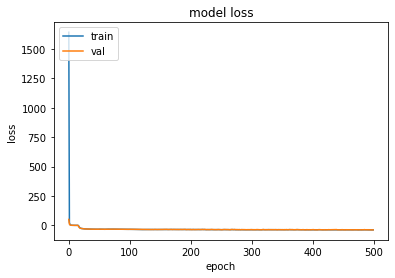

In [164]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

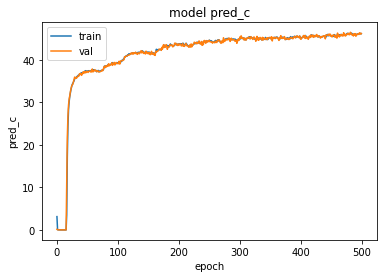

In [165]:
import matplotlib.pyplot as plt
plt.plot(history.history['pred_c'])
plt.plot(history.history['val_pred_c'])
plt.title('model pred_c')
plt.ylabel('pred_c')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

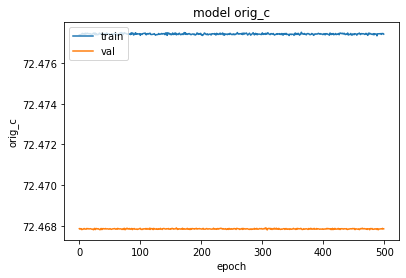

In [166]:
import matplotlib.pyplot as plt
plt.plot(history.history['orig_c'])
plt.plot(history.history['val_orig_c'])
plt.title('model orig_c')
plt.ylabel('orig_c')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

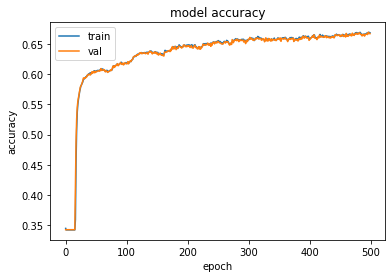

In [169]:
import matplotlib.pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

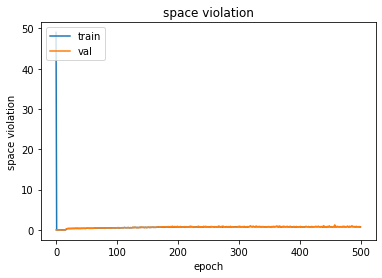

In [170]:
import matplotlib.pyplot as plt
plt.plot(history.history['space_violation'])
plt.plot(history.history['val_space_violation'])
plt.title('space violation')
plt.ylabel('space violation')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

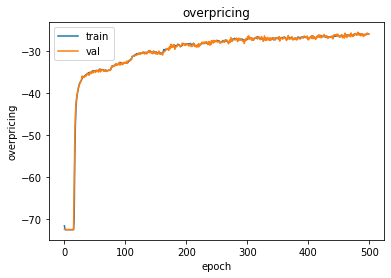

In [171]:
import matplotlib.pyplot as plt
plt.plot(history.history['overpricing'])
plt.plot(history.history['val_overpricing'])
plt.title('overpricing')
plt.ylabel('overpricing')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [172]:
Output = model.predict(test_x_nz)
print(Output)

c:\users\venkat\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[[3.8108242e-01 6.4903462e-01 3.6491793e-01 ... 0.0000000e+00
  1.3407428e-16 8.1054950e-01]
 [9.9956167e-01 9.9962568e-01 0.0000000e+00 ... 9.9947691e-01
  9.7555444e-15 9.9995875e-01]
 [9.9974328e-01 9.9718386e-01 0.0000000e+00 ... 9.9992561e-01
  4.2744349e-15 9.9998569e-01]
 ...
 [9.9981153e-01 9.9996054e-01 9.9996293e-01 ... 0.0000000e+00
  4.1751469e-15 9.9999666e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.9956253e-01
  2.0599504e-17 0.0000000e+00]
 [9.9895644e-01 0.0000000e+00 9.9934852e-01 ... 0.0000000e+00
  4.3338051e-15 0.0000000e+00]]


In [173]:
test_y_nz

array([[1, 0, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [174]:
Output.round()

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [175]:
c=0
d=0

for i,j in zip(Output,X_2_nz_test):
  s = np.dot(i,j)
  #print(s)
  #print(k)
  if s<1 or s==1 :
    c = c+1
  else:
    d = d+1
print(c)
print(d)

11774
13700


In [177]:
c=0
d=0

for i,j in zip(Output.round(),X_2_nz_test):
  s = np.dot(i,j)
  #print(s)
  #print(k)
  if s<1 or s==1 :
    c = c+1
  else:
    d = d+1
print(c)
print(d)

11784
13690
